In [1]:
'''import packages'''

import pandas as pd
import numpy as np

import sklearn
from sklearn import svm
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

In [2]:
'''read data'''

recipes = pd.read_csv('../data/bld_recipe_data.csv')
recipes.head()

recipe           model  id                     recipe_name  \
0  breakfast-id1  recipes.recipe   1                  Breakfast Cups   
1  breakfast-id2  recipes.recipe   2                  Easy Shakshuka   
2  breakfast-id3  recipes.recipe   3  Lemon-Ricotta Cornmeal Waffles   
3  breakfast-id4  recipes.recipe   4             Bacon and Egg Tacos   
4  breakfast-id5  recipes.recipe   5         Eggs Benedict Casserole   

   servings group_name  calories  protein  carbohydrates   fat  \
0        18  breakfast     190.4      8.3           13.6  11.4   
1         4  breakfast     293.5     13.1           40.9   9.4   
2         4  breakfast     406.1     12.3           52.2  16.6   
3         6  breakfast     435.7     18.9           40.5  22.0   
4        10  breakfast     281.3     17.5           21.2  14.1   

                                         ingredients  \
0  ['cooking spray', '18 biscuit (2-1/2" dia)s re...   
1  ['1 tablespoon olive oil', '2 cloves garlic, m...   
2  ['1 cup all-purpose flour', '½ cup cornmeal', ...   
3  ['6 large eggs eggs', '¼ cup crumbled cooked b...   
4  ['cooking spray', '8 large eggs', '2 cups milk...   

                                       recipe_source  
0  https://www.allrecipes.com/recipe/233747/break...  
1  https://www.allrecipes.com/recipe/190276/easy-...  
2  https://www.allrecipes.com/recipe/274974/lemon...  
3  https://www.allrecipes.com/recipe/245713/bacon...  
4  https://www.allrecipes.com/recipe/221988/eggs-...

In [3]:
'''specify inputs for the model'''

ingredients = recipes[['calories','protein','carbohydrates','fat']].as_matrix()
type_label = np.where(recipes['group_name']=='breakfast', 1, 0)
# type_label_lunch = np.where(recipes['group_name']=='lunch', 2, 0)
# type_label_dinner = np.where(recipes['group_name']=='dinner', 1, 0)
# type_label = type_label_breakfast + type_label_lunch + type_label_dinner

In [4]:
'''feature extraction'''

def normalization_processing(data):
    
    data_mean = data.mean()
    data_std = data.std()
    
    data = data - data_mean
    data = data / data_std
    
    return data

ingredients[:,0] = normalization_processing(ingredients[:,0]) # normalize calories

print(ingredients[1], ingredients[1][1:4], ingredients[1][1], sum(ingredients[1]), ingredients[0:5,0])
print(max(ingredients[:,0]), min(ingredients[:,0]))

for i in range(len(ingredients)):
    ingredients[i][1:4] = ingredients[i][1:4]/(sum(ingredients[i][1:4])+1) # percentage of protein, carbohydrates, fat

[-0.47752454 13.1        40.9         9.4       ] [13.1 40.9  9.4] 13.1 62.9224754573547 [-0.90544678 -0.47752454 -0.01017203  0.1126844  -0.52816132]
38.332656463526035 -1.6957124798163097


In [5]:
ingredients

array([[-0.90544678,  0.24198251,  0.39650146,  0.33236152],
       [-0.47752454,  0.20341615,  0.63509317,  0.14596273],
       [-0.01017203,  0.1498173 ,  0.63580999,  0.20219245],
       ...,
       [ 0.259199  ,  0.35779817,  0.45463812,  0.17737003],
       [ 1.15820924,  0.27736626,  0.37942387,  0.33497942],
       [-0.30610661,  0.15374332,  0.69117647,  0.14171123]])

In [6]:
print(ingredients)
print(type_label)
print(type_label[1],type_label[5000],type_label[15000])

[[-0.90544678  0.24198251  0.39650146  0.33236152]
 [-0.47752454  0.20341615  0.63509317  0.14596273]
 [-0.01017203  0.1498173   0.63580999  0.20219245]
 ...
 [ 0.259199    0.35779817  0.45463812  0.17737003]
 [ 1.15820924  0.27736626  0.37942387  0.33497942]
 [-0.30610661  0.15374332  0.69117647  0.14171123]]
[1 1 1 ... 0 0 0]
1 0 0


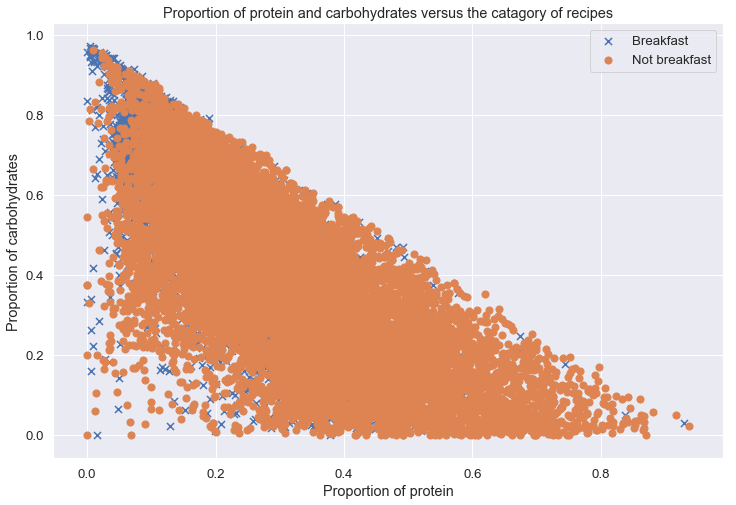

In [7]:
data = pd.DataFrame(ingredients, columns=['calories', 'protein','carbohydrates','fat'])
data['group_name'] = type_label

breakfast = data[data['group_name'].isin([1])]
non_breakfast = data[data['group_name'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(breakfast['protein'], breakfast['carbohydrates'], s=50, marker='x', label='Breakfast')
ax.scatter(non_breakfast['protein'], non_breakfast['carbohydrates'], s=50, marker='o', label='Not breakfast')

ax.legend()
plt.xlabel('Proportion of protein')
plt.ylabel('Proportion of carbohydrates')
plt.title('Proportion of protein and carbohydrates versus the catagory of recipes')
plt.show()

In [8]:
svc = svm.SVC(C=1, gamma=1, kernel='linear') # decision_function_shape='ovo'
svc

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
svc.fit(data[['calories', 'protein','carbohydrates','fat']], data['group_name'])
svc.score(data[['calories', 'protein','carbohydrates','fat']], data['group_name'])

0.7587100956084913

In [10]:
svc2 = svm.SVC(C=100, gamma=100, kernel='linear')
svc2.fit(data[['calories', 'protein','carbohydrates','fat']], data['group_name'])
svc2.score(data[['calories', 'protein','carbohydrates','fat']], data['group_name'])

0.7587100956084913

In [ ]:
X_train, X_validate, y_train, y_validate = sklearn.model_selection.train_test_split(
    data[['calories', 'protein','carbohydrates','fat']], data['group_name'], 
    test_size=0.33, 
    random_state=42)

In [ ]:
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

# C_values = [0.01, 1, 100]
# gamma_values = [0.01, 1, 100]

best_score = 0
best_params = {'C': None, 'gamma': None}

for C in C_values:
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma,kernel='linear')
        svc.fit(X_train, y_train)
        score = svc.score(X_validate, y_validate)
        
        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma

best_score, best_params

In [ ]:
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

# C_values = [0.01, 1, 100]
# gamma_values = [0.01, 1, 100]

best_score = 0
best_params = {'C': None, 'gamma': None}

for C in C_values:
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma,kernel='rbf')
        svc.fit(X_train, y_train)
        score = svc.score(X_validate, y_validate)
        
        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma

best_score, best_params

In [8]:
clf = svm.SVC(C=30, gamma=100, kernel='rbf', probability=True)
clf.fit(data[['calories', 'protein','carbohydrates','fat']], data['group_name'])
clf.score(data[['calories', 'protein','carbohydrates','fat']], data['group_name'])

0.8626910819424188

In [115]:
data['SVM_Confidence'] = clf.decision_function(data[['calories', 'protein','carbohydrates','fat']])

In [116]:
data

calories   protein  carbohydrates       fat  group_name  SVM_Confidence
0     -0.905447  0.241983       0.396501  0.332362           1        0.977158
1     -0.477525  0.203416       0.635093  0.145963           1       -1.095675
2     -0.010172  0.149817       0.635810  0.202192           1        0.901487
3      0.112684  0.229369       0.491505  0.266990           1       -0.986541
4     -0.528161  0.325279       0.394052  0.262082           1       -1.085726
5      0.846503  0.090299       0.754478  0.147761           1        1.690317
6     -0.854810  0.448387       0.016129  0.503226           1        1.000281
7     -0.715766  0.132867       0.784965  0.064685           1        0.920716
8     -1.206777  0.064257       0.698795  0.196787           1        1.762548
9     -0.927860  0.401338       0.093645  0.471572           1        0.425170
10    -0.520275  0.063717       0.683186  0.235398           1        0.999754
11    -1.038680  0.135952       0.655589  0.178248           1        1.000346
12    -0.636491  0.066667       0.648485  0.264646           1        1.071171
13    -0.729463  0.066536       0.774951  0.138943           1        1.303598
14    -0.110200  0.125541       0.548341  0.311688           1       -0.311447
15    -0.800438  0.171694       0.591647  0.213457           1       -0.511520
16    -1.194325  0.011976       0.952096  0.005988           1        0.999801
17    -0.314408  0.162521       0.510779  0.310116           1       -0.790955
18    -0.761838  0.057915       0.818533  0.104247           1        0.894397
19    -0.698334  0.205426       0.651163  0.124031           1       -0.989018
20    -0.122652  0.136000       0.634667  0.216000           1        0.609018
21    -0.603286  0.056364       0.738182  0.187273           1        1.210187
22    -0.668865  0.133595       0.658153  0.188605           1        1.000060
23    -0.739425  0.132505       0.677019  0.169772           1        0.717923
24    -0.827001  0.170807       0.254658  0.543478           1        0.017636
25    -1.053622  0.364017       0.066946  0.527197           1        1.773511
26    -0.393683  0.376736       0.210069  0.395833           1       -1.149928
27    -0.894655  0.119617       0.698565  0.157895           1        0.854604
28    -0.726143  0.080645       0.743952  0.155242           1        0.999850
29    -0.309427  0.070626       0.601926  0.311396           1        1.000100
...         ...       ...            ...       ...         ...             ...
18483  1.572850  0.314168       0.400411  0.278576           0       -1.000246
18484 -0.433114  0.205663       0.681073  0.098361           0       -1.476266
18485  0.602865  0.326653       0.339679  0.323647           0       -2.139625
18486  0.313156  0.294006       0.545195  0.151284           0       -1.234914
18487  0.712440  0.468508       0.054144  0.466298           0       -1.918780
18488  1.197224  0.268312       0.414013  0.309713           0       -1.048609
18489 -0.353838  0.527434       0.130973  0.323894           0       -1.385910
18490 -0.067865  0.386792       0.446934  0.154481           0       -2.214268
18491  0.191545  0.274441       0.449941  0.263840           0       -0.999787
18492  0.829070  0.358857       0.044571  0.585143           0       -0.999749
18493  0.023447  0.405286       0.493392  0.090308           0       -0.999982
18494 -0.614908  0.297445       0.516423  0.167883           0       -1.077273
18495  0.125551  0.215896       0.499407  0.272835           0       -1.034575
18496 -0.049187  0.341098       0.133111  0.509151           0       -1.497362
18497  1.706083  0.267150       0.549472  0.176781           0       -0.999815
18498 -0.612003  0.237219       0.443763  0.298569           0       -1.085616
18499  0.026353  0.494737       0.090226  0.400000           0       -1.110731
18500  0.057067  0.141542       0.752589  0.094361           0       -0.999882
18501  0.201921  0.506961       0.230858  0.250580       

In [171]:
world_recipes = pd.read_csv('../data/world_recipe_data.csv')
world_recipes.head()

recipe           model  id               recipe_name  servings  \
0  not known-id1  recipes.recipe   1            2-Step Chicken         4   
1  not known-id2  recipes.recipe   2  20-Minute Chicken Creole         8   
2  not known-id3  recipes.recipe   3               3-Can Chili         6   
3  not known-id4  recipes.recipe   4      5 A Day Bulgur Wheat         8   
4  not known-id5  recipes.recipe   5             5 A Day Salad         4   

  group_name  calories  protein  carbohydrates       fat  \
0  not known    45.250    4.250           1.25  2.500000   
1  not known     9.500    1.000           0.75  0.375000   
2  not known    21.500    1.000           4.50  0.166667   
3  not known    80.875    4.125          14.00  1.250000   
4  not known    24.750    1.250           5.25  0.250000   

                                         ingredients  \
0  ['1 tablespoon vegetable oil', '2 Boneless chi...   
1  ['1 tablespoon vegetable oil', '2 chicken brea...   
2  ['1 can beans low-sodium undrained (pinto kidn...   
3  ['1 onion (medium chopped)', '1 cup broccoli (...   
4  ['4 cups spinach (fresh)', '4 cups romaine let...   

                                       recipe_source  
0  https://www.choosemyplate.gov/recipes/suppleme...  
1  https://www.choosemyplate.gov/recipes/suppleme...  
2  https://www.choosemyplate.gov/recipes/suppleme...  
3  https://www.choosemyplate.gov/recipes/suppleme...  
4  https://www.choosemyplate.gov/recipes/suppleme...

In [172]:
'''feature extraction'''

world_ingredients = world_recipes[['calories','protein','carbohydrates','fat']].as_matrix()
world_ingredients[:,0] = normalization_processing(world_ingredients[:,0]) # normalize calories

print(world_ingredients[1], world_ingredients[1][1:4], world_ingredients[1][1], 
      sum(world_ingredients[1]), world_ingredients[0:5,0])
print(max(world_ingredients[:,0]), min(world_ingredients[:,0]))

for i in range(len(world_ingredients)):
    world_ingredients[i][1:4] = world_ingredients[i][1:4]/(sum(world_ingredients[i][1:4])+1) 
    # percentage of protein, carbohydrates, fat

world_ingredients
    

[-1.34177958  1.          0.75        0.375     ] [1.    0.75  0.375] 1.0 0.7832204233727429 [-1.18901865 -1.34177958 -1.29050318 -1.03679186 -1.27661583]
9.192955549174695 -1.3823733884610847


array([[-1.18901865,  0.47222222,  0.13888889,  0.27777778],
       [-1.34177958,  0.32      ,  0.24      ,  0.12      ],
       [-1.29050318,  0.15      ,  0.675     ,  0.025     ],
       ...,
       [-0.75466487,  0.22374429,  0.14611872,  0.58447489],
       [ 0.50288869,  0.42442748,  0.15419847,  0.40610687],
       [-1.06403244,  0.08333333,  0.54166667,  0.30555556]])

In [173]:
predict = clf.predict(world_ingredients)
predict

array([0, 0, 1, ..., 1, 0, 0])

In [174]:
confidence = clf.decision_function(world_ingredients)

In [175]:
confidence

array([-2.75633526, -0.90680955,  1.33706918, ...,  1.92083461,
       -1.31531207, -0.30688618])

In [176]:
confidence.mean()

-0.5936656912426609

In [177]:
confidence.max()

5.046579122687372

In [178]:
confidence.min()

-5.268882811631211

In [179]:
category = np.array([])
for i in  range(len(predict)):
    if confidence[i] >= 0.5 and predict[i] == 1:
        category = np.append(category,['breakfast'])
    if confidence[i] <= -0.5 and predict[i] == 0:
        category = np.append(category,['not breakfast'])
    if -0.5 < confidence[i] < 0.5:
        category = np.append(category,['not sure'])

In [180]:
category

array(['not breakfast', 'not breakfast', 'breakfast', ..., 'breakfast',
       'not breakfast', 'not sure'], dtype='<U32')

In [181]:
len(predict), len(category)

(9352, 9352)

In [182]:
world_recipes

recipe           model    id  \
0        not known-id1  recipes.recipe     1   
1        not known-id2  recipes.recipe     2   
2        not known-id3  recipes.recipe     3   
3        not known-id4  recipes.recipe     4   
4        not known-id5  recipes.recipe     5   
5        not known-id6  recipes.recipe     6   
6        not known-id7  recipes.recipe     7   
7        not known-id8  recipes.recipe     8   
8        not known-id9  recipes.recipe     9   
9       not known-id10  recipes.recipe    10   
10      not known-id11  recipes.recipe    11   
11      not known-id12  recipes.recipe    12   
12      not known-id13  recipes.recipe    13   
13      not known-id14  recipes.recipe    14   
14      not known-id15  recipes.recipe    15   
15      not known-id16  recipes.recipe    16   
16      not known-id17  recipes.recipe    17   
17      not known-id18  recipes.recipe    18   
18      not known-id19  recipes.recipe    19   
19      not known-id20  recipes.recipe    20   
20      not known-id21  recipes.recipe    21   
21      not known-id22  recipes.recipe    22   
22      not known-id23  recipes.recipe    23   
23      not known-id24  recipes.recipe    24   
24      not known-id25  recipes.recipe    25   
25      not known-id26  recipes.recipe    26   
26      not known-id27  recipes.recipe    27   
27      not known-id28  recipes.recipe    28   
28      not known-id29  recipes.recipe    29   
29      not known-id30  recipes.recipe    30   
...                ...             ...   ...   
9322  GreekFood-id9323  recipes.recipe  9323   
9323  GreekFood-id9324  recipes.recipe  9324   
9324  GreekFood-id9325  recipes.recipe  9325   
9325  GreekFood-id9326  recipes.recipe  9326   
9326  GreekFood-id9327  recipes.recipe  9327   
9327  GreekFood-id9328  recipes.recipe  9328   
9328  GreekFood-id9329  recipes.recipe  9329   
9329  GreekFood-id9330  recipes.recipe  9330   
9330  GreekFood-id9331  recipes.recipe  9331   
9331  GreekFood-id9332  recipes.recipe  9332   
9332  GreekFood-id9333  recipes.recipe  9333   
9333  GreekFood-id9334  recipes.recipe  9334   
9334  GreekFood-id9335  recipes.recipe  9335   
9335  GreekFood-id9336  recipes.recipe  9336   
9336  GreekFood-id9337  recipes.recipe  9337   
9337  GreekFood-id9338  recipes.recipe  9338   
9338  GreekFood-id9339  recipes.recipe  9339   
9339  GreekFood-id9340  recipes.recipe  9340   
9340  GreekFood-id9341  recipes.recipe  9341   
9341  GreekFood-id9342  recipes.recipe  9342   
9342  GreekFood-id9343  recipes.recipe  9343   
9343  GreekFood-id9344  recipes.recipe  9344   
9344  GreekFood-id9345  recipes.recipe  9345   
9345  GreekFood-id9346  recipes.recipe  9346   
9346  GreekFood-id9347  recipes.recipe  9347   
9347  GreekFood-id9348  recipes.recipe  9348   
9348  GreekFood-id9349  recipes.recipe  9349   
9349  GreekFood-id9350  recipes.recipe  9350   
9350  GreekFood-id9351  recipes.recipe  9351   
9351  GreekFood-id9352  recipes.recipe  9352   

                                            recipe_name  servings group_name  \
0                                        2-Step Chicken         4  not known   
1                              20-Minute Chicken Creole         8  not known   
2                                           3-Can Chili         6  not known   
3                                  5 A Day Bulgur Wheat         8  not known   
4                                         5 A Day Salad         4  not known   
5                                A Simple Mexican Salad         4  not known   
6                                              Ambrosia         8  not known   
7                                       Angel Food Cake        12  not known   
8     Angel Food Pastry with Fresh Berries and Whipp...         1  not known   
9                       Any Days a Picnic Chicken Salad         6  not known   
10                                        Anytime Pizza         2  not known   
11                                Apple & Chicken Salad         4  not known   

In [183]:
world_recipes['breakfast_judge'] = category
world_recipes

recipe           model    id  \
0        not known-id1  recipes.recipe     1   
1        not known-id2  recipes.recipe     2   
2        not known-id3  recipes.recipe     3   
3        not known-id4  recipes.recipe     4   
4        not known-id5  recipes.recipe     5   
5        not known-id6  recipes.recipe     6   
6        not known-id7  recipes.recipe     7   
7        not known-id8  recipes.recipe     8   
8        not known-id9  recipes.recipe     9   
9       not known-id10  recipes.recipe    10   
10      not known-id11  recipes.recipe    11   
11      not known-id12  recipes.recipe    12   
12      not known-id13  recipes.recipe    13   
13      not known-id14  recipes.recipe    14   
14      not known-id15  recipes.recipe    15   
15      not known-id16  recipes.recipe    16   
16      not known-id17  recipes.recipe    17   
17      not known-id18  recipes.recipe    18   
18      not known-id19  recipes.recipe    19   
19      not known-id20  recipes.recipe    20   
20      not known-id21  recipes.recipe    21   
21      not known-id22  recipes.recipe    22   
22      not known-id23  recipes.recipe    23   
23      not known-id24  recipes.recipe    24   
24      not known-id25  recipes.recipe    25   
25      not known-id26  recipes.recipe    26   
26      not known-id27  recipes.recipe    27   
27      not known-id28  recipes.recipe    28   
28      not known-id29  recipes.recipe    29   
29      not known-id30  recipes.recipe    30   
...                ...             ...   ...   
9322  GreekFood-id9323  recipes.recipe  9323   
9323  GreekFood-id9324  recipes.recipe  9324   
9324  GreekFood-id9325  recipes.recipe  9325   
9325  GreekFood-id9326  recipes.recipe  9326   
9326  GreekFood-id9327  recipes.recipe  9327   
9327  GreekFood-id9328  recipes.recipe  9328   
9328  GreekFood-id9329  recipes.recipe  9329   
9329  GreekFood-id9330  recipes.recipe  9330   
9330  GreekFood-id9331  recipes.recipe  9331   
9331  GreekFood-id9332  recipes.recipe  9332   
9332  GreekFood-id9333  recipes.recipe  9333   
9333  GreekFood-id9334  recipes.recipe  9334   
9334  GreekFood-id9335  recipes.recipe  9335   
9335  GreekFood-id9336  recipes.recipe  9336   
9336  GreekFood-id9337  recipes.recipe  9337   
9337  GreekFood-id9338  recipes.recipe  9338   
9338  GreekFood-id9339  recipes.recipe  9339   
9339  GreekFood-id9340  recipes.recipe  9340   
9340  GreekFood-id9341  recipes.recipe  9341   
9341  GreekFood-id9342  recipes.recipe  9342   
9342  GreekFood-id9343  recipes.recipe  9343   
9343  GreekFood-id9344  recipes.recipe  9344   
9344  GreekFood-id9345  recipes.recipe  9345   
9345  GreekFood-id9346  recipes.recipe  9346   
9346  GreekFood-id9347  recipes.recipe  9347   
9347  GreekFood-id9348  recipes.recipe  9348   
9348  GreekFood-id9349  recipes.recipe  9349   
9349  GreekFood-id9350  recipes.recipe  9350   
9350  GreekFood-id9351  recipes.recipe  9351   
9351  GreekFood-id9352  recipes.recipe  9352   

                                            recipe_name  servings group_name  \
0                                        2-Step Chicken         4  not known   
1                              20-Minute Chicken Creole         8  not known   
2                                           3-Can Chili         6  not known   
3                                  5 A Day Bulgur Wheat         8  not known   
4                                         5 A Day Salad         4  not known   
5                                A Simple Mexican Salad         4  not known   
6                                              Ambrosia         8  not known   
7                                       Angel Food Cake        12  not known   
8     Angel Food Pastry with Fresh Berries and Whipp...         1  not known   
9                       Any Days a Picnic Chicken Salad         6  not known   
10                                        Anytime Pizza         2  not known   
11                                Apple & Chicken Salad         4  not known   

In [184]:
world_recipes.to_csv('../data/bld_world_recipes.csv')

In [185]:
num_breakfast = 0
num_not_breakfast = 0
num_both = 0
for i in range(len(world_recipes['breakfast_judge'])):
    if world_recipes['breakfast_judge'][i] == 'breakfast':
        num_breakfast += 1
    if world_recipes['breakfast_judge'][i] == 'not breakfast':
        num_not_breakfast += 1
    if world_recipes['breakfast_judge'][i] == 'not sure':
        num_both += 1
num_breakfast, num_not_breakfast, num_both

(1998, 6149, 1205)